In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

path = '/media/robert/Data_Storage/Data/Experimental/Stark_Broadening/6-4-19_Spectrometer/'

In [2]:
dataset = '1906040001'
spectrum = np.load(path+dataset+'/michaelito_'+dataset+'_0000.npy').item()
l = spectrum['lambda']
N = len(l)

In [3]:
def integrate_dataset(dataset):
    file = path + str(dataset) + '/michaelito_' + str(dataset) + '_'
    I = np.zeros(N, dtype='double')
    for i in range(100):
        filename = file + '%04d.npy' % i
        I += np.load(filename).item()['I']
    return I

In [4]:
def plot_spectrum(*args, xlim=None, ylim=None, lines=None, title=None):
    if xlim is None:
        xlim = (l[0], l[-1])
    plt.figure(figsize=(8, 2), dpi=150)
    ax = plt.subplot()
    peak = 0
    colors = [plt.cm.brg(i) for i in np.linspace(0, 1, len(args))]
    ax.set_prop_cycle('color', colors)
    for arg in args:
        plt.plot(l, arg, linewidth=0.2)
        amax = np.amax(arg)
        if amax > peak:
            peak = amax
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Counts')
    plt.xlim(xlim)
    if ylim is None:
        ylim = (-1000, 1.05*peak)
    plt.ylim(ylim)
    if lines is not None:
        for i in range(len(lines)):
            line = lines[i]
            plt.plot([line, line], [ylim[0], ylim[1]], 'k--', linewidth=0.2)
    if title is not None:
        plt.title(title)
    plt.show()

In [5]:
def adjust(data, background, start, end):
    data_adjusted = data - background
    data_adjusted -= np.average(data_adjusted[start:end])
    return data_adjusted

In [6]:
def plot_line(ind, xlim, lines, ylim):
    plt.figure(figsize=(8, 3), dpi=150)
    ax = plt.subplot()
    colors = [plt.cm.brg(i) for i in np.linspace(0, 1, 9)]
    ax.set_prop_cycle('color', colors)
    linewidth = 0.4
    plt.plot(l, intensity[0], linewidth=linewidth, label='%0.2E' % densities[0])
    plt.plot(l, intensity[1], linewidth=linewidth, label='%0.2E' % densities[1])
    plt.plot(l, intensity[2], linewidth=linewidth, label='%0.2E' % densities[2])
    plt.plot(l, intensity[3], linewidth=linewidth, label='%0.2E' % densities[3])
    plt.plot(l, intensity[4], linewidth=linewidth, label='%0.2E' % densities[4])
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Counts')
    plt.xlim(xlim)
    plt.ylim(ylim)
    for i in range(len(lines)):
        line = lines[i]
        plt.plot([line, line], [ylim[0], ylim[1]], 'k--', linewidth=0.2)
    plt.legend(title='Densities ($cm^{-3}$)', loc='upper left')
    plt.show()
    
    # Let's look at the 763.5
    plt.figure(figsize=(8, 3), dpi=150)
    ax = plt.subplot()
    colors = [plt.cm.brg(i) for i in np.linspace(0, 1, 9)]
    ax.set_prop_cycle('color', colors)
    linewidth = 0.4
    print(l[ind])
    plt.plot(l, intensity[0]/intensity[0][ind], linewidth=linewidth, label='%0.2E' % densities[0])
    plt.plot(l, intensity[1]/intensity[1][ind], linewidth=linewidth, label='%0.2E' % densities[1])
    plt.plot(l, intensity[2]/intensity[2][ind], linewidth=linewidth, label='%0.2E' % densities[2])
    plt.plot(l, intensity[3]/intensity[3][ind], linewidth=linewidth, label='%0.2E' % densities[3])
    plt.plot(l, intensity[4]/intensity[4][ind], linewidth=linewidth, label='%0.2E' % densities[4])
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Counts')
    plt.xlim(xlim)
    plt.ylim(0, 1.2)
    for i in range(len(lines)):
        line = lines[i]
        plt.plot([line, line], [ylim[0], ylim[1]], 'k--', linewidth=0.2)
    plt.legend(title='Densities ($cm^{-3}$)', loc='upper left')
    plt.show()

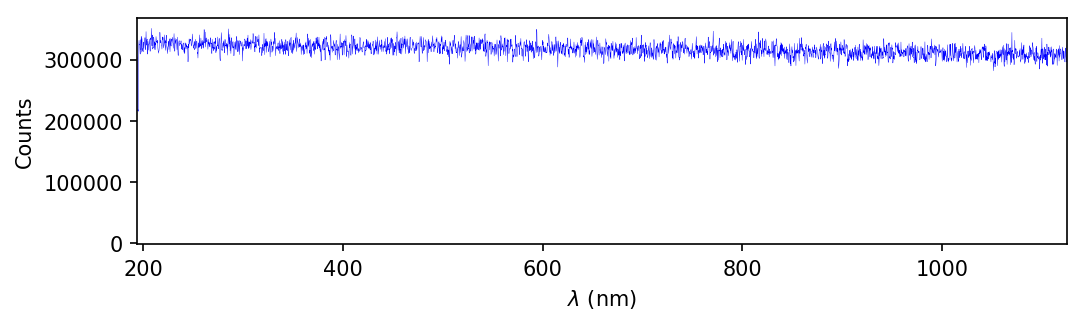

In [7]:
background1 = integrate_dataset(1906040016)
plot_spectrum(background1)

In [8]:
densities = np.array([5e16, 7.5e16, 1e17, 1.25e17, 1.5e17])
intensity = np.zeros((len(densities), N))
intensity[0] = adjust(integrate_dataset(1906040002), background1, 0, 800)
intensity[1] = adjust(integrate_dataset(1906040003), background1, 0, 800)
intensity[2] = adjust(integrate_dataset(1906040004), background1, 0, 800)
intensity[3] = adjust(integrate_dataset(1906040005), background1, 0, 800)
intensity[4] = adjust(integrate_dataset(1906040007), background1, 0, 800)

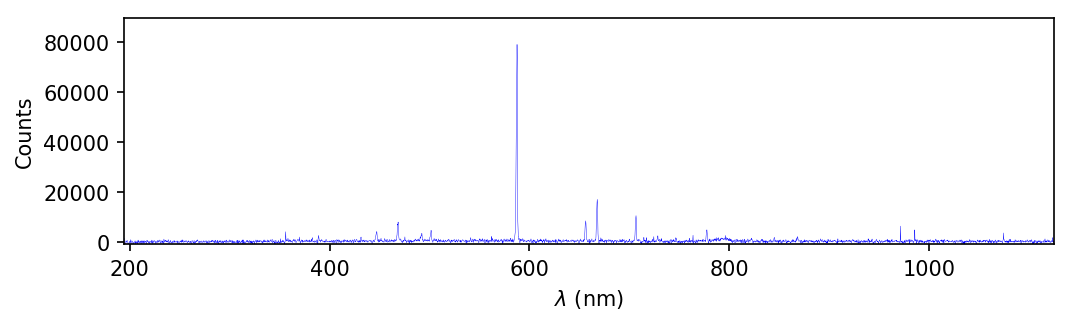

In [9]:
plot_spectrum(intensity[4], ylim=(-1000, 90000))

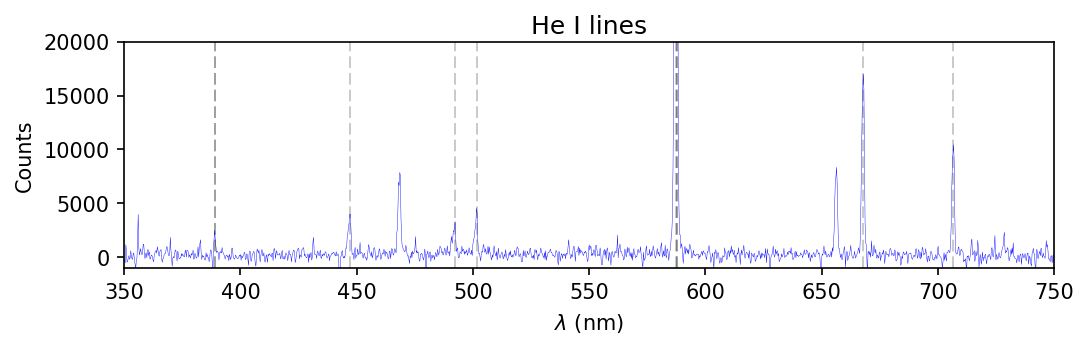

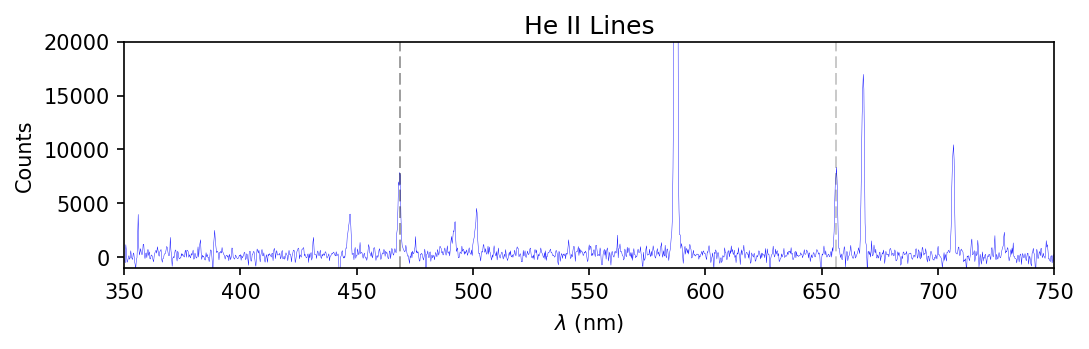

In [10]:
# Helium lines with intensity greater than 100
lines = np.array([3888.6456, 3888.6489, 4471.479, 4921.931, 5015.678, 5875.6148, 5875.6404, 5875.9663, 6678.1517,
                  7065.1771, 10829.0911, 10830.2501, 10830.3398])
lines = lines/10
# Singly ionized Helium lines
lines2 = np.array([4685.7038, 4685.7044, 6560.10])
lines2 = lines2/10

plot_spectrum(intensity[4], xlim=(350, 750), ylim=(-1000, 20000), lines=lines, title='He I lines')
plot_spectrum(intensity[4], xlim=(350, 750), ylim=(-1000, 20000), lines=lines2, title='He II Lines')

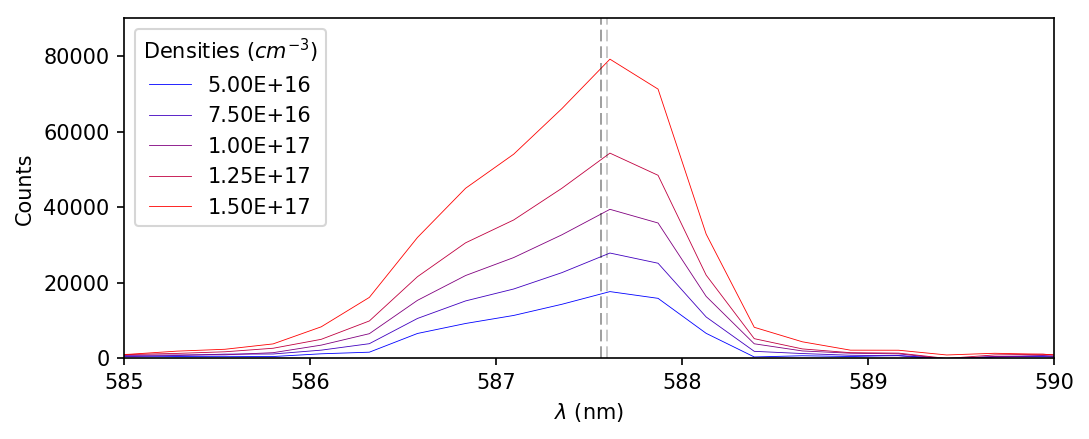

587.6109789530777


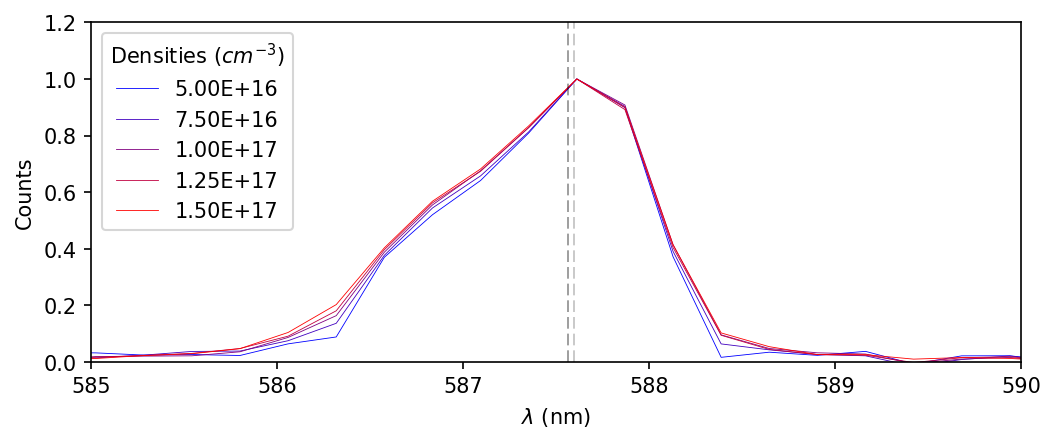

In [11]:
# Detailed look at the four peaks with the largest signal
plot_line(1486, [585, 590], [587.56148, 587.56404, 587.59663], [0, 90000])

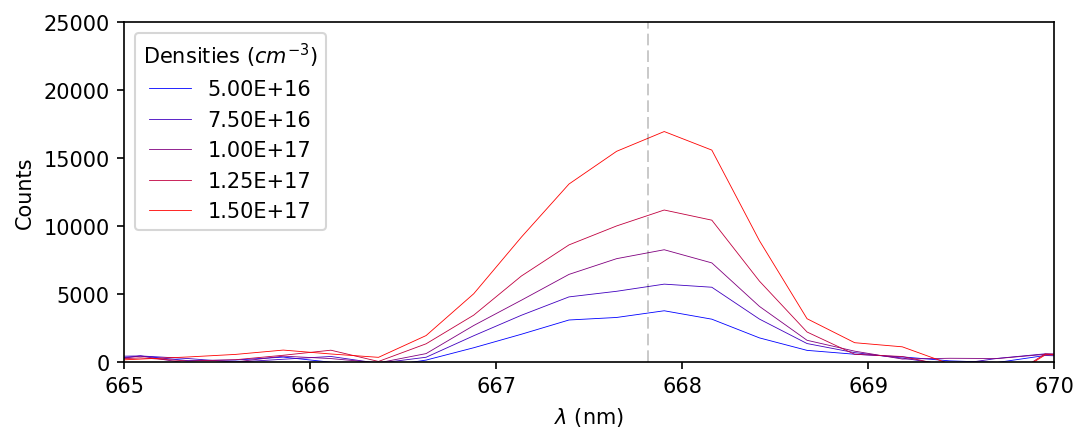

667.9034844649251


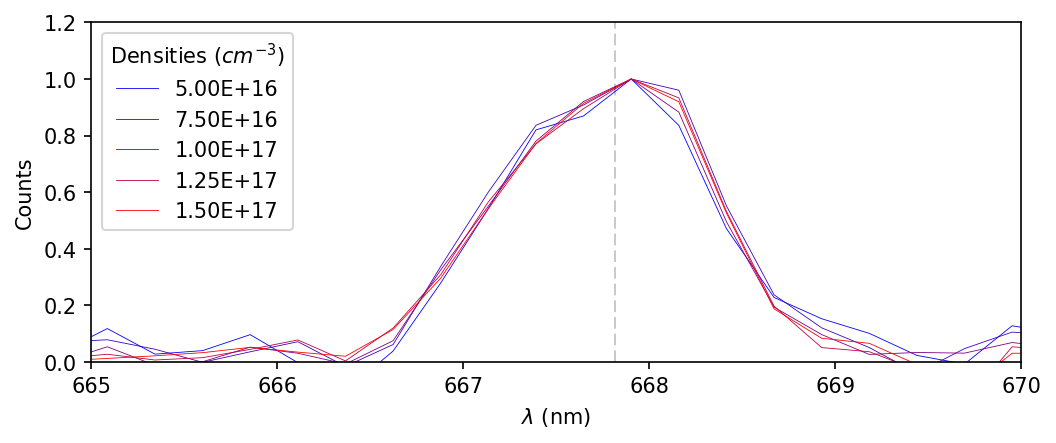

In [12]:
plot_line(1798, [665, 670], [667.81517], [0, 25000])

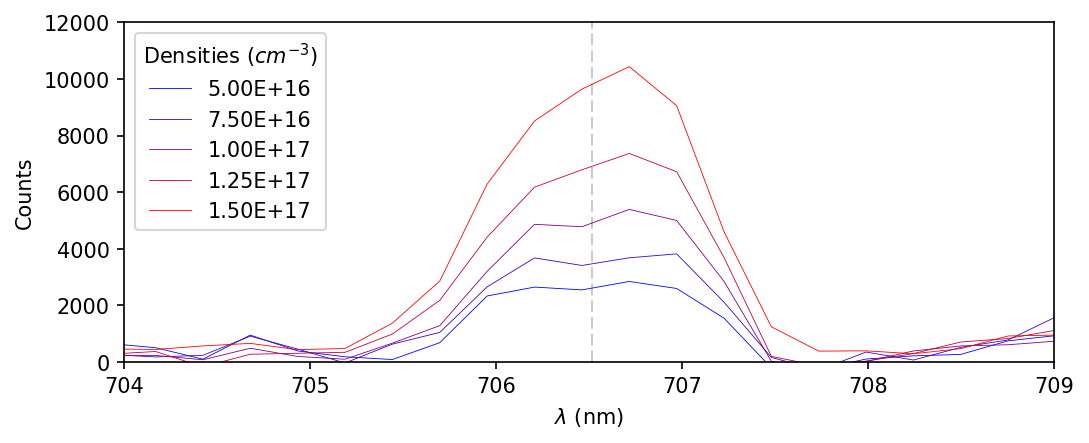

706.7156479505625


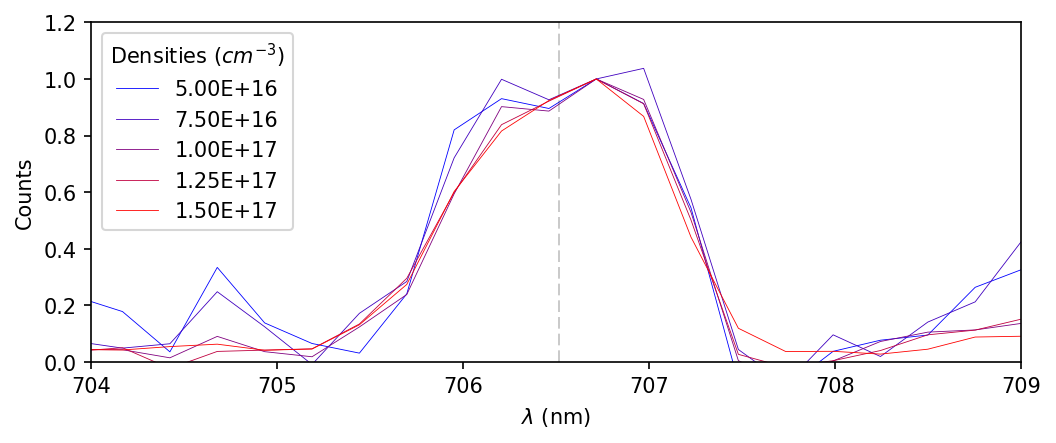

In [21]:
plot_line(1950, [704, 709], [706.51771], [0, 12000])

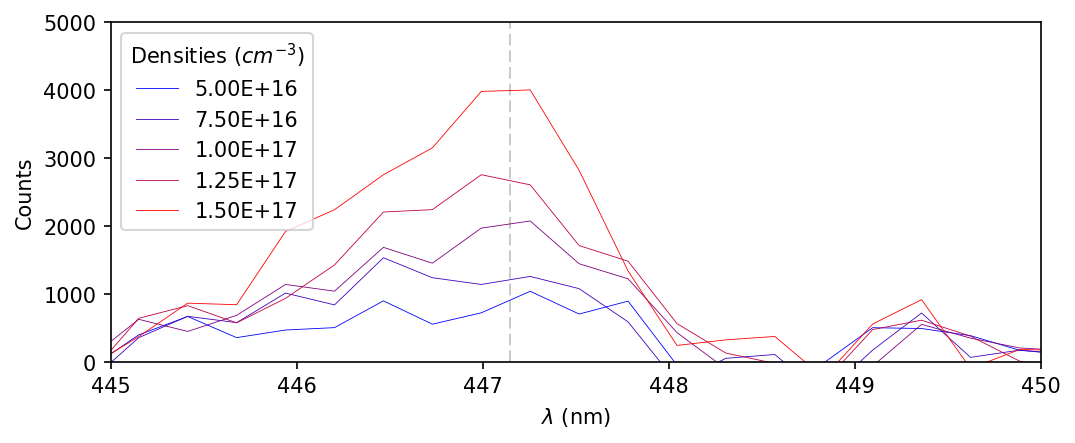

447.254298939627


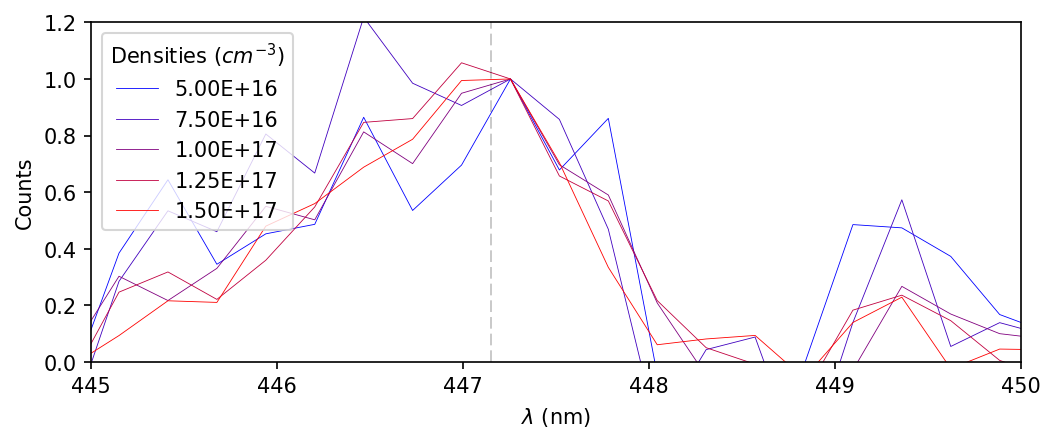

In [35]:
plot_line(948, [445, 450], [447.1479], [0, 5000])

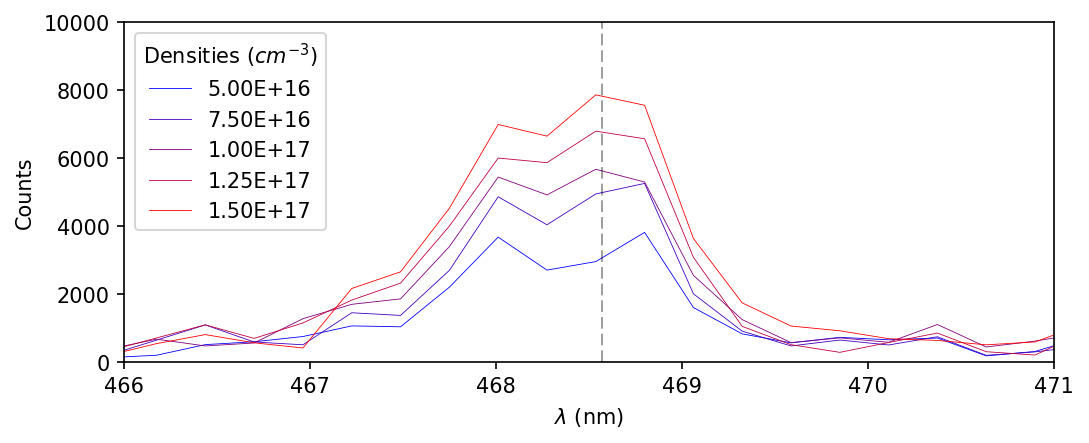

468.5356781063978


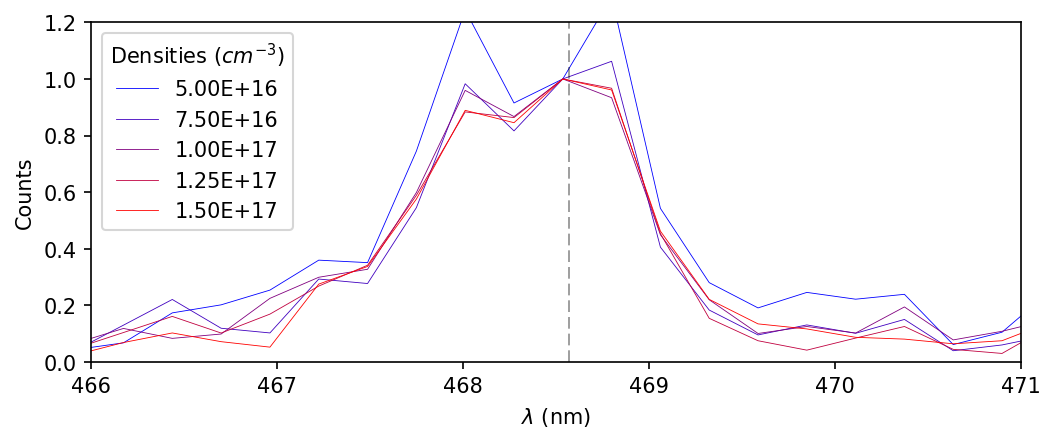

In [43]:
# Detailed look at the two visible Helium II peaks
plot_line(1029, [466, 471], [468.57038, 468.57044], [0, 10000])

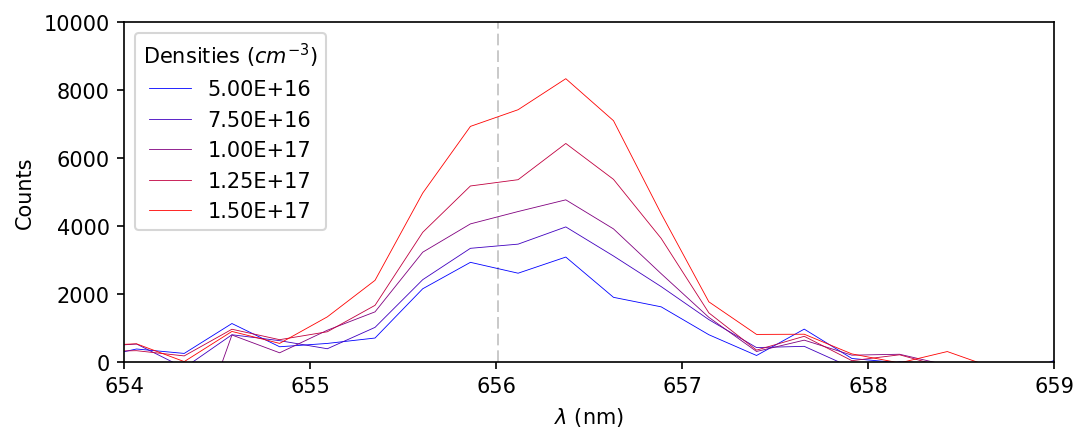

656.374370078689


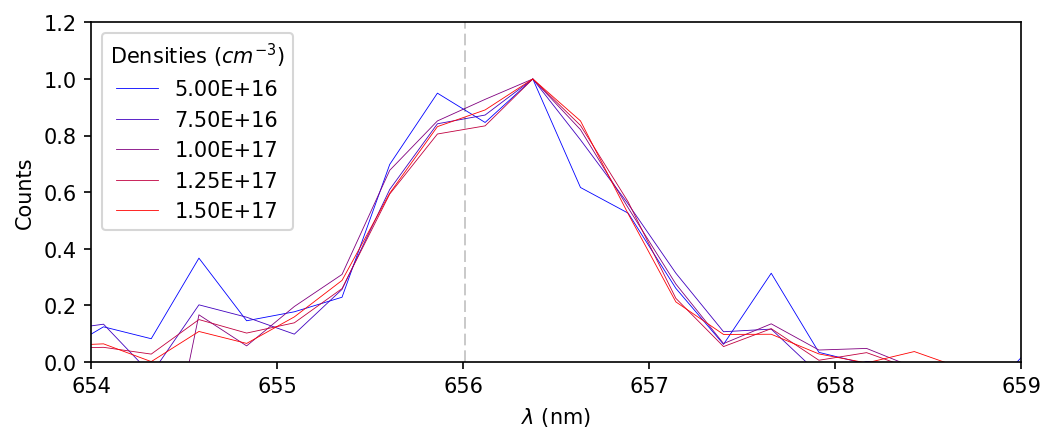

In [49]:
# Detailed look at the two visible Helium II peaks
plot_line(1753, [654, 659], [656.010], [0, 10000])

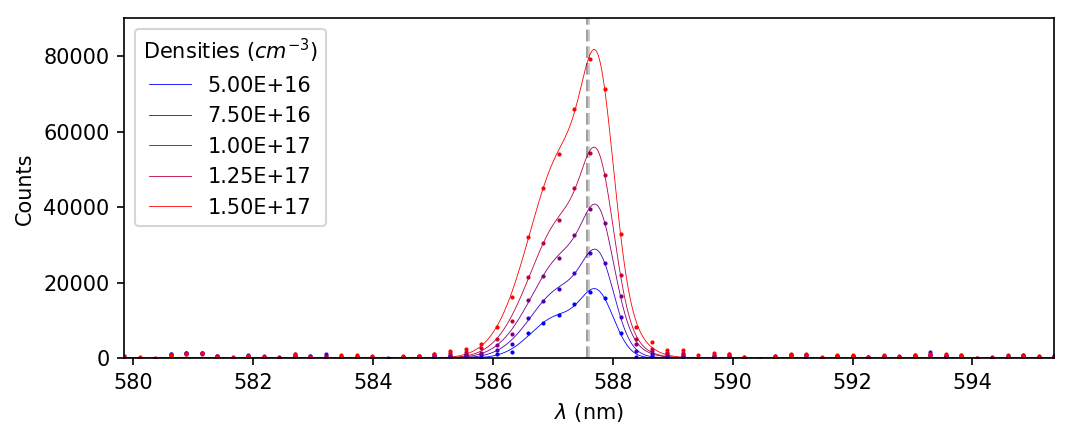

In [106]:
# Starting with the most promising peaks, I fit Lorentzians and use these to compare the widths
from scipy.optimize import curve_fit
ind = 1486
lines = [587.56148, 587.56404, 587.59663]
ylim = [0, 90000]

def lorentzian(l, gamma, l0, A):
    return A*(gamma**2 / ((l-l0)**2+gamma**2) / (np.pi*gamma))

def gaussian(l, sigma, l0, A, sigma2, l02, A2):
    return A*(np.exp(-(l-l0)**2/2/sigma**2)) + abs(A2)*(np.exp(-(l-l02)**2/2/sigma2**2))

dl = 30
xlim = [l[ind-dl], l[ind+dl]]
popt = np.zeros((len(densities), 6))
popt[0], pcov = curve_fit(gaussian, l[ind-dl:ind+dl], intensity[0][ind-dl:ind+dl], p0=[0.5, 587, 10000, 0.2, 588, 15000])
popt[1], pcov = curve_fit(gaussian, l[ind-dl:ind+dl], intensity[1][ind-dl:ind+dl], p0=[0.5, 587, 10000, 0.2, 588, 15000])
popt[2], pcov = curve_fit(gaussian, l[ind-dl:ind+dl], intensity[2][ind-dl:ind+dl], p0=[0.5, 587, 20000, 0.2, 588, 30000])
popt[3], pcov = curve_fit(gaussian, l[ind-dl:ind+dl], intensity[3][ind-dl:ind+dl], p0=[0.5, 587, 20000, 0.2, 588, 30000])
popt[4], pcov = curve_fit(gaussian, l[ind-dl:ind+dl], intensity[4][ind-dl:ind+dl], p0=[0.5, 587, 20000, 0.2, 588, 30000])
l_plot = np.linspace(l[ind-dl], l[ind+dl], 1000)

plt.figure(figsize=(8, 3), dpi=150)
ax = plt.subplot()
colors = [plt.cm.brg(i) for i in np.linspace(0, 1, 9)]
ax.set_prop_cycle('color', colors)
linewidth = 0.4
plt.plot(l_plot, gaussian(l_plot, *popt[0]), linewidth=linewidth, label='%0.2E' % densities[0])
plt.plot(l_plot, gaussian(l_plot, *popt[1]), linewidth=linewidth, label='%0.2E' % densities[1])
plt.plot(l_plot, gaussian(l_plot, *popt[2]), linewidth=linewidth, label='%0.2E' % densities[2])
plt.plot(l_plot, gaussian(l_plot, *popt[3]), linewidth=linewidth, label='%0.2E' % densities[3])
plt.plot(l_plot, gaussian(l_plot, *popt[4]), linewidth=linewidth, label='%0.2E' % densities[4])
plt.plot(l, intensity[0], '.', markersize=2.0, c=colors[0])
plt.plot(l, intensity[1], '.', markersize=2.0, c=colors[1])
plt.plot(l, intensity[2], '.', markersize=2.0, c=colors[2])
plt.plot(l, intensity[3], '.', markersize=2.0, c=colors[3])
plt.plot(l, intensity[4], '.', markersize=2.0, c=colors[4])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Counts')
plt.xlim(xlim)
plt.ylim(ylim)
for i in range(len(lines)):
    line = lines[i]
    plt.plot([line, line], [ylim[0], ylim[1]], 'k--', linewidth=0.2)
plt.legend(title='Densities ($cm^{-3}$)', loc='upper left')
plt.show()

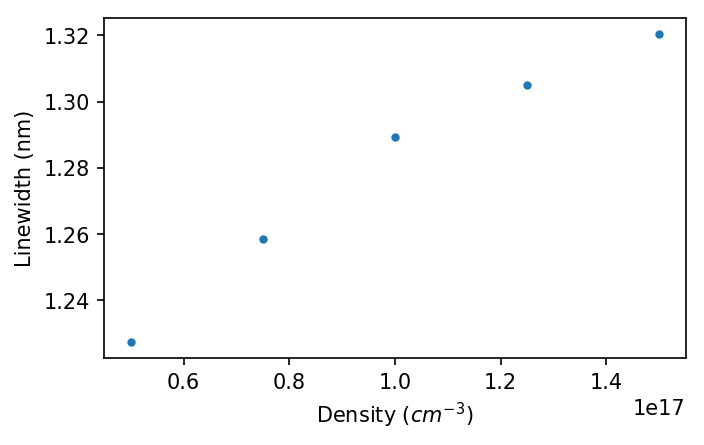

In [139]:
def fwhm(x, y):
    Y_half = np.amax(y)/2
    d = np.sign(Y_half - y[0:-1]) - np.sign(Y_half - y[1:])
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return (x[right_idx] - x[left_idx])[0]

widths = np.zeros(len(densities))
for i in range(len(densities)):
    widths[i] = fwhm(l_plot, gaussian(l_plot, *popt[i]))
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(densities, widths, '.')
den_plot = np.linspace(0.5e17, 1.5e17, 100)
plt.xlabel('Density ($cm^{-3}$)')
plt.ylabel('Linewidth (nm)')
plt.show()